In [1]:
import numpy as np
import tensorflow as tf
import cv2
import os

/Users/tyronemariano/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
best_model_file = os.path.expanduser("~/Desktop/lung-Unet.keras")
model = tf.keras.models.load_model(best_model_file)
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256, 256,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ activation[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │    147,584 │ activation_2[0][… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │      1,024 │ conv2d_4[0][0]  

 Total params: 94,183,941 (359.28 MB)

 Trainable params: 31,390,721 (119.75 MB)

 Non-trainable params: 11,776 (46.00 KB)

 Optimizer params: 62,781,444 (239.49 MB)

None


In [3]:
width = 256
height = 256

In [4]:
testImagePath = "test/test2.jpeg"
img = cv2.imread(testImagePath)
img2 = cv2.resize(img, (width, height))
img2 = img2/255.0
imgForModel = np.expand_dims(img2, axis=0) 

In [5]:
p = model.predict(imgForModel)
resultMask = p[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 858ms/step


In [6]:
print(resultMask.shape)

(256, 256, 1)


In [7]:
resultMask[resultMask <= 0.5] = 0
resultMask[resultMask > 0.5] = 255

In [8]:
scale_percent = 60
w = int(img.shape[1] * scale_percent/100)
h = int(img.shape[0] * scale_percent/100)
dim = (w,h)

In [9]:
img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
mask = cv2.resize(resultMask, dim, interpolation=cv2.INTER_AREA)

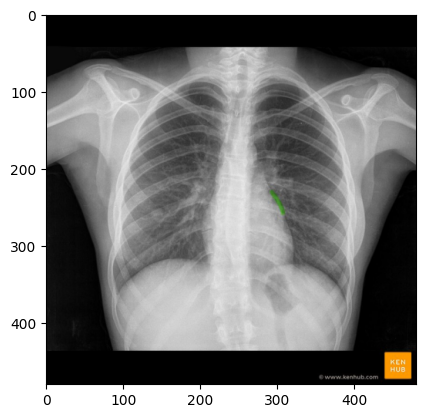

In [10]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.show()

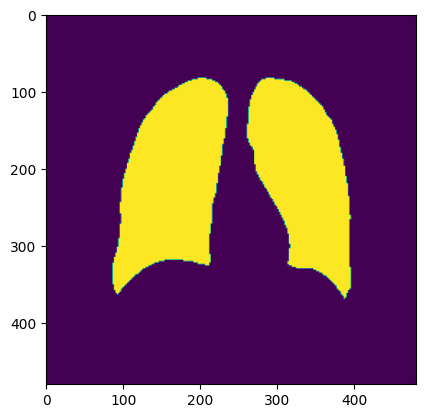

In [11]:
plt.imshow(mask)
plt.show()

In [12]:
# cv2.imshow("first image", img)

In [13]:
# cv2.imshow("predicted mask", mask)

In [14]:
print(img.shape)
print(mask.shape)

(480, 480, 3)
(480, 480)


In [15]:
mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

_, mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)

In [16]:
print(img.shape)
print(mask.shape)

(480, 480, 3)
(480, 480, 3)


In [17]:
print(img.dtype)  # Likely uint8
print(mask.dtype)  # Might be float32 or something else

uint8
float32


In [18]:
mask = mask.astype(np.uint8)

In [19]:
print(img.dtype)  # Likely uint8
print(mask.dtype)  # Might be float32 or something else

uint8
uint8


In [20]:
# Apply mask directly (No need for cvtColor)
masked_image = cv2.bitwise_and(img, mask)

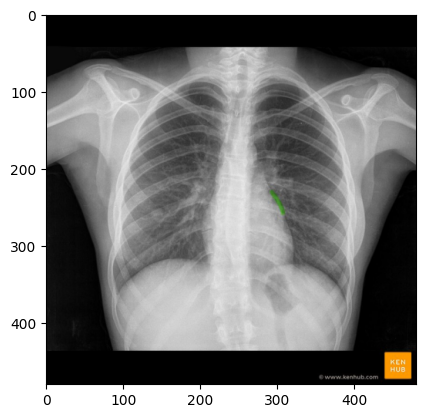

In [21]:
plt.imshow(img)
plt.show()

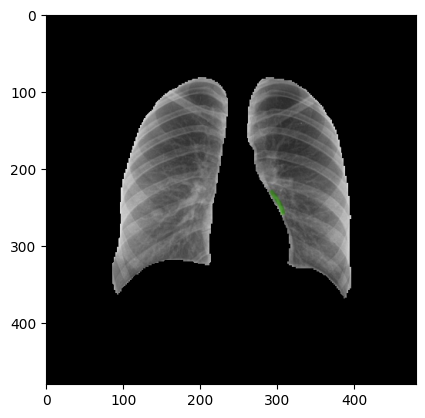

In [22]:
plt.imshow(masked_image)
plt.show()

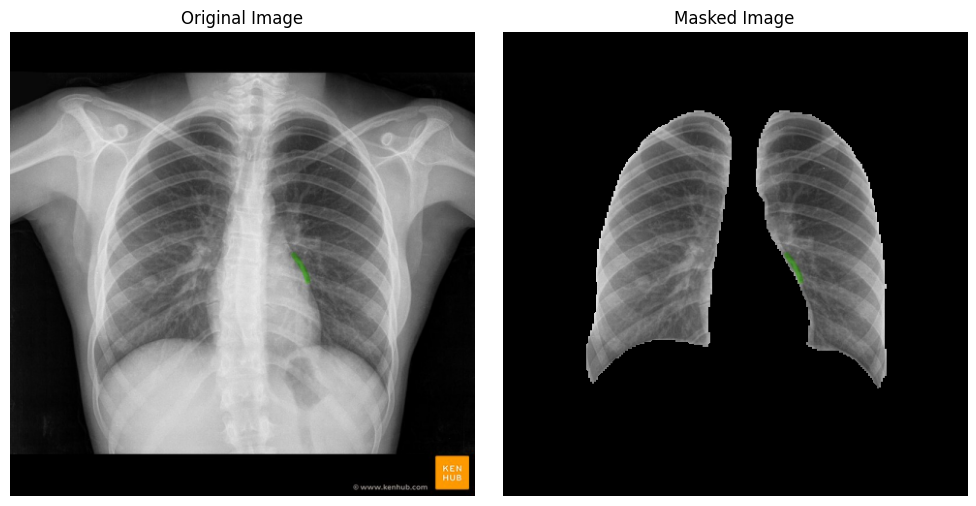

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Display first image
axes[0].imshow(img, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis("off")

# Display second image
axes[1].imshow(masked_image, cmap='gray')
axes[1].set_title("Masked Image")
axes[1].axis("off")

plt.tight_layout()
plt.show()